In [ ]:
# Starting to explore stability of commodities using shipping data in the BKB dataset
# 24.07.2024
# vera.provatorova@dh.huc.knaw.nl

<a class="anchor" id="start"></a>

## Steps:
* [Read the data](#read-data)
* [Convert shipping quantity values to decimal](#convert-values)
* [Aggregate the data](#aggregate)
* [Connect the commodities with GLOBALISE thesaurus](#globalise)
* [Calculate variation coefficients](#calculate-variation)
* [Explore the results](#explore-results)
* [Plot selected commodities per decade](#plot-commodities)
* [Calculate regression slopes](#regression-slopes)



### Read the data <a class="anchor" id="read-data"></a>

In [5]:
DATA_DIR = 'data/' # change the path when running to point to your data directory

In [6]:
# First step: read the BKB data
import glob
import pandas as pd
from os.path import splitext, basename

def get_name(path):
    '''
    in: path/to/data/bgb_cargo.tsv
    out: cargo
    '''
    root, ext = splitext(path) # 'path/to/data/bgb_cargo.tsv' -> 'path/to/data/bgb_cargo', '.tsv'
    return basename(root).split('_')[-1] # 'path/to/data/bgb_cargo' -> 'bgb_cargo' -> 'cargo'

bkb_data = {get_name(path): pd.read_csv(path,sep='\t',low_memory=False) 
           for path in glob.glob(DATA_DIR+'bkb_cargo_logs/*')} # we assume the sheets are stored separately as .tsv files

In [7]:
# Display the data
from IPython.display import display
for key, df in bkb_data.items():
    print(key+':')
    display(df.head(3))

ship:


,id,naam,added_when,added_by,timestamp
0,3067,Vrouwe Agatha,5/21/08 15:37,mjo,5/21/08 15:37
1,3076,Faam,5/22/08 11:28,mjo,5/22/08 11:28
2,3065,Dordrecht,5/21/08 15:07,mjo,5/21/08 15:07


source:


,id,naam,added_when,added_by,timestamp
0,105,10758.0,5/6/08 11:47,admin,4/9/08 16:55
1,104,10757.0,5/6/08 11:47,admin,4/9/08 16:55
2,103,10756.0,5/6/08 11:47,admin,4/9/08 16:55


relVoyageShip:


,id,voyId,shipId,timestamp,DAS_voyage,DAS_shipID
0,46,99359.0,3070,5/21/08 16:52,95688.0,DAS_ship0660
1,51,99365.0,3077,5/22/08 11:48,95666.0,DAS_ship1806
2,49,99362.0,3074,5/22/08 10:47,95694.0,DAS_ship0496


regio:


,id,naam,added_when,added_by,timestamp
0,3059,Kaap de Goede Hoop,5/6/08 11:46,Admin,5/6/08 11:47
1,3061,Mauritius,5/6/08 11:46,Admin,5/6/08 11:47
2,3062,Mokka,5/6/08 11:46,Admin,5/6/08 11:47


unit:


,id,naam,added_when,added_by,timestamp
0,88,pees,5/21/08 10:03,jsc,5/21/08 10:03
1,52,aam,4/9/08 16:38,Admin,4/9/08 16:39
2,54,balie,4/9/08 16:38,Admin,4/9/08 16:39


place:


,id,naam,added_when,added_by,timestamp,regio,voc_place_ID,standardized toponym,URI,lat,long
0,902,Kupang,5/6/08 11:43,Admin,5/6/08 11:44,3169.0,vocUniquePlaceID_5164,Kupang ID,http://sws.geonames.org/2057087/,-10.17083,123.60694
1,903,Pontianak,5/6/08 11:43,Admin,5/6/08 11:44,3171.0,vocUniquePlaceID_5165,Pontianak ID,http://sws.geonames.org/1630789/,-0.03194,109.32500
2,900,Kisar,5/6/08 11:43,Admin,5/6/08 11:44,3162.0,vocUniquePlaceID_5166,Pulau Kisar ID,http://sws.geonames.org/1639966/,-8.06112,127.18200


product:


,id,naam,added_when,added_by,timestamp
0,1196,spreien,5/6/08 11:52,Admin,5/6/08 11:54
1,1195,spijker,5/6/08 11:52,Admin,1/9/13 13:36
2,4313,speciestok,9/26/12 14:56,Admin,9/26/12 14:56


voyage:


,url,voyId,voyBookingDay,voyBookingMonth,voyBookingYear,voyDeparturePlaceId,voyDepartureDay,voyDepartureMonth,voyDepartureYear,voyArrivalPlaceId,...,timestamp,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields,first_ship_name
0,https://bgb.huygens.knaw.nl/bgb/voyage/1,99351,NaN,NaN,1790,934.0,NaN,NaN,NaN,861.0,...,2013-09-10 14:30:24,147.0,1,NaN,NaN,3185,3129,3,1 Batavia Batavia Amsterdam Republiek 1789 1...,Juffrouw Johanna
1,https://bgb.huygens.knaw.nl/bgb/voyage/2,99352,NaN,NaN,1790,934.0,NaN,NaN,NaN,861.0,...,2013-09-10 14:30:24,147.0,2,NaN,NaN,3185,3129,3,2 Batavia Batavia Amsterdam Republiek 1789 1...,Draak
2,https://bgb.huygens.knaw.nl/bgb/voyage/3,99353,NaN,NaN,1790,934.0,NaN,NaN,NaN,861.0,...,2013-09-10 14:30:24,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank


cargo:


,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,carValueLicht,carValueLichtGuldens,carValueLichtStuivers,carValueLichtPenningen,carRemarks,carOrder,changed_when,changed_by,timestamp,all_fields
0,645880,99353,1290.0,NaN,NaN,NaN,NaN,"1.623,30",1623.0,3.0,...,NaN,NaN,NaN,NaN,NaN,9.0,6/25/08 12:42,jsc,8/5/13 10:50,samen
1,645881,99353,1230.0,848.0,88.0,4,4,"371,8",371.0,8.0,...,NaN,NaN,NaN,NaN,NaN,10.0,5/21/08 14:41,mjo,8/5/13 10:50,"zakhorloge zilveren, voor Japan pees"
2,645877,99353,1133.0,16295.0,88.0,4,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,2/25/13 10:09,DorineS,8/5/13 10:50,"moir√© gouden, voor Japan pees"


specification:


,id,naam,added_when,added_by,timestamp
0,652,tot inktkokers,5/6/08 11:55,Admin,3/13/13 15:27
1,15877,Constantia rood,2/6/13 16:30,DorineS,2/6/13 16:30
2,654,arduinen,5/6/08 11:55,Admin,5/6/08 11:55


### Convert shipping quantities to decimal <a class="anchor" id="convert-values"></a>

#### [Go to top](#start)

In [8]:
# Preparing the data
df_cargo = bkb_data['cargo'].dropna(subset=['carQuantityNumeric','carProductId','carVoyageId'])
df_product = bkb_data['product'].dropna(subset=['id'])
df_voyage = bkb_data['voyage'].dropna(subset=['voyId','voyDepartureYear'])
df_specification = bkb_data['specification']

In [9]:
df_voyage.columns

Index(['url', 'voyId', 'voyBookingDay', 'voyBookingMonth', 'voyBookingYear',
       'voyDeparturePlaceId', 'voyDepartureDay', 'voyDepartureMonth',
       'voyDepartureYear', 'voyArrivalPlaceId', 'voyArrivalDay',
       'voyArrivalMonth', 'voyArrivalYear', 'voyInvoiceValue',
       'voyInvoiceValueLicht', 'voyRemarksForEditor', 'voyageDAS',
       'created_when', 'created_by', 'changed_when', 'changed_by', 'timestamp',
       'voySourceId', 'voynumber', 'voyImage', 'voyRemarksForEndUser',
       'voyDepartureRegioId', 'voyArrivalRegioId', 'voyFolioNummer',
       'all_fields', 'first_ship_name'],
      dtype='object')

In [10]:
def quantity_to_decimal(q, qnum): # Cleaning up the messy BKB quantities data
    if q == '4.501,11/12': # One case like this, fixing manually
        return pd.to_numeric(4501 + 11/12)
    if qnum.count('.') < 2:  # already a numb  er
        return pd.to_numeric(qnum)
    if q.find(' ') == -1:
        try:
            return pd.to_numeric(qnum)
        except:
            print('Failed to convert qnum, using q instead: ',q, qnum)
            return pd.to_numeric(q.replace('.',''))
        
    q = q.replace('  ',' ') # removing extra spaces
    q = q.replace('/ ','/')
    q = q.replace(' /','/')
        
    try:
        num, frac = q.split(' ') # eg. 8 1/4
    except:
        print(q, qnum)
        num, frac = q.split(' ')
    try:
        frac = frac.replace(' ','')
        a, b = frac.split('/')
    except:
        print('Fraction problem with: ',q, qnum)
        a, b = frac.split('.') # data entry error, confused . and /
    return pd.to_numeric(num.replace('.','').replace(',','')) + pd.to_numeric(a)/pd.to_numeric(b)
    

In [11]:
df_specification

,id,naam,added_when,added_by,timestamp
0,652,tot inktkokers,5/6/08 11:55,Admin,3/13/13 15:27
1,15877,Constantia rood,2/6/13 16:30,DorineS,2/6/13 16:30
2,654,arduinen,5/6/08 11:55,Admin,5/6/08 11:55
3,655,baar,5/6/08 11:55,Admin,5/6/08 11:55
4,656,Bangkaas,5/6/08 11:55,Admin,5/6/08 11:55
...,...,...,...,...,...
15071,23688,"met zilverbeslag, geschenk van diverse vorsten",7/24/13 13:17,NicolienK,7/24/13 13:17
15072,23689,"met ijzerlaadje, geschenk voor de sultan van Java",7/24/13 15:59,NicolienK,7/24/13 15:59
15073,23690,geschenk voor de sultan van Java,7/24/13 15:59,NicolienK,7/24/13 15:59
15074,23691,"met koperen gevesten en scheden, geschenk voor...",7/24/13 15:59,NicolienK,7/24/13 15:59


In [12]:
import numpy as np

df_product['id'] = df_product['id'].astype(int)
df_voyage['voyId'] = df_voyage['voyId'].astype(str)
df_voyage['voyDepartureYear'] = df_voyage['voyDepartureYear'].astype(int)
df_specification['id'] = pd.to_numeric(df_specification['id'],errors='coerce')
df_cargo['carQuantityNumeric'] = df_cargo.apply(lambda row: quantity_to_decimal(row['carQuantity'],
                                                                               row['carQuantityNumeric']),
                                                axis=1)

/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_27077/71340384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voyage['voyId'] = df_voyage['voyId'].astype(str)
/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_27077/71340384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voyage['voyDepartureYear'] = df_voyage['voyDepartureYear'].astype(int)


Failed to convert qnum, using q instead:  8770 8.769.231
Failed to convert qnum, using q instead:  60.905 60.905.375
Fraction problem with:  46.126 1.6 46.126.166
Failed to convert qnum, using q instead:  33761 33.761.003
Failed to convert qnum, using q instead:  30660 30.659.997


/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_27077/71340384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cargo['carQuantityNumeric'] = df_cargo.apply(lambda row: quantity_to_decimal(row['carQuantity'],


### Aggregate the data <a class="anchor" id="aggregate"></a>
#### [Go to top](#start)

In [13]:
# Merge cargo with product and voyage data
df_merged = df_cargo.merge(df_product, left_on='carProductId', right_on='id', how='left')\
                    .merge(df_voyage, left_on='carVoyageId', right_on='voyId', how='left').dropna(subset=['voyDepartureYear'])

df_merged.head()

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,timestamp,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
176,646292,99379,1034.0,731.0,69.0,1.078,1078.0,"533,12",533.0,12.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk
177,646293,99379,1128.0,NaN,69.0,141,141.0,"176,8",176.0,8.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk
178,646294,99379,1140.0,NaN,69.0,4.301,4301.0,"709,13",709.0,13.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk
179,646295,99379,1156.0,852.0,69.0,61.984,61984.0,"7.611,14",7611.0,14.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk
180,646296,99379,1156.0,838.0,69.0,6.250,6250.0,"1413,9",1413.0,9.0,...,2013-09-10 14:30:24,147.0,27.0,NaN,NaN,3129.0,3185.0,65,27 Amsterdam Republiek Batavia Batavia 1789 ...,Valk


In [56]:
def get_specification(cargo_id):
    df_target = df_specification[df_specification['id']==cargo_id]
    if len(df_target)>0:
        return df_target.iloc[0]['naam']
    print('Failed to find specification for id: ',cargo_id)
    return ''
df_merged['nameComplete'] = df_merged.apply(lambda row: row['naam'] if pd.isna(row['carSpecificationId'])
                                           else row['naam'] + ' ' + get_specification(row['carSpecificationId']),
                                           axis=1)
df_merged['nameComplete'] = df_merged['nameComplete'].map(lambda x: x.strip())

Failed to find specification for id:  920.0
Failed to find specification for id:  920.0
Failed to find specification for id:  920.0
Failed to find specification for id:  920.0
Failed to find specification for id:  920.0
Failed to find specification for id:  751.0
Failed to find specification for id:  751.0
Failed to find specification for id:  767.0
Failed to find specification for id:  920.0
Failed to find specification for id:  841.0
Failed to find specification for id:  920.0
Failed to find specification for id:  1260.0
Failed to find specification for id:  841.0
Failed to find specification for id:  841.0
Failed to find specification for id:  841.0
Failed to find specification for id:  920.0
Failed to find specification for id:  920.0
Failed to find specification for id:  767.0
Failed to find specification for id:  767.0
Failed to find specification for id:  767.0
Failed to find specification for id:  685.0
Failed to find specification for id:  1200.0
Failed to find specification f

Failed to find specification for id:  1877.0
Failed to find specification for id:  1058.0
Failed to find specification for id:  1200.0
Failed to find specification for id:  1883.0
Failed to find specification for id:  979.0
Failed to find specification for id:  979.0
Failed to find specification for id:  979.0
Failed to find specification for id:  1567.0
Failed to find specification for id:  979.0
Failed to find specification for id:  979.0
Failed to find specification for id:  979.0
Failed to find specification for id:  979.0
Failed to find specification for id:  1851.0
Failed to find specification for id:  1851.0
Failed to find specification for id:  979.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1877.0
Failed to find specification for id:  1058.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1877.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1877.0
Failed to find spe

Failed to find specification for id:  2048.0
Failed to find specification for id:  1246.0
Failed to find specification for id:  1246.0
Failed to find specification for id:  841.0
Failed to find specification for id:  920.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  685.0
Failed to find specification for id:  685.0
Failed to find specification for id:  1625.0
Failed to find specification for id:  2134.0
Failed to find specification for id:  920.0
Failed to find specification for id:  767.0
Failed to find specification for id:  767.0
Failed to find specification for id:  1865.0
Failed to find specification for id:  841.0
Failed to find specification for id:  767.0
Failed to find specification for id:  1058.0
Failed to find specification for id:  841.0
Failed to find specification for id:  2198.0
Failed to find specification for id:  841.0
Failed to find specification for id:  767.0
Failed to find specifi

Failed to find specification for id:  767.0
Failed to find specification for id:  979.0
Failed to find specification for id:  1200.0
Failed to find specification for id:  767.0
Failed to find specification for id:  1752.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  767.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1058.0
Failed to find specification for id:  1058.0
Failed to find specification for id:  1058.0
Failed to find specification for id:  1246.0
Failed to find specification for id:  2324.0
Failed to find specification for id:  1246.0
Failed to find specification for id:  1851.0
Failed to find specification for id:  1752.0
Failed to find specification for id:  1200.0
Failed to find specification for id:  767.0
Failed to find specification for id:  2324.0
Failed to find specification for id:  1246.0
Failed to find specification for id:  1246.0
Failed to find specification for id:  1752.0
Failed to find 

Failed to find specification for id:  1246.0
Failed to find specification for id:  767.0
Failed to find specification for id:  767.0
Failed to find specification for id:  1246.0
Failed to find specification for id:  767.0
Failed to find specification for id:  2318.0
Failed to find specification for id:  2324.0
Failed to find specification for id:  2642.0
Failed to find specification for id:  1877.0
Failed to find specification for id:  2642.0
Failed to find specification for id:  1877.0
Failed to find specification for id:  767.0
Failed to find specification for id:  2324.0
Failed to find specification for id:  767.0
Failed to find specification for id:  767.0
Failed to find specification for id:  767.0
Failed to find specification for id:  2324.0
Failed to find specification for id:  2324.0
Failed to find specification for id:  767.0
Failed to find specification for id:  1260.0
Failed to find specification for id:  1752.0
Failed to find specification for id:  1752.0
Failed to find spe

Failed to find specification for id:  1865.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  767.0
Failed to find specification for id:  767.0
Failed to find specification for id:  2324.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  767.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  767.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  2134.0
Failed to find specification for id:  1865.0
Failed to find specification for id:  1625.0
Failed to find specification for id:  767.0
Failed to find specification for id:  1865.0
Failed to find specification for id:  1752.0
Failed to find 

Failed to find specification for id:  1887.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  2758.0
Failed to find specification for id:  767.0
Failed to find specification for id:  1851.0
Failed to find specification for id:  3152.0
Failed to find specification for id:  1851.0
Failed to find specification for id:  1851.0
Failed to find specification for id:  1877.0
Failed to find specification for id:  1260.0
Failed to find specification for id:  979.0
Failed to find specification for id:  979.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  979.0
Failed to find specification for id:  2134.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  979.0
Failed to find specification for id:  1851.0
Failed to find specification for id:  1246.0
Failed to find specification for id:  1246.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  751.0
Failed to find s

Failed to find specification for id:  1761.0
Failed to find specification for id:  1851.0
Failed to find specification for id:  2307.0
Failed to find specification for id:  2307.0
Failed to find specification for id:  767.0
Failed to find specification for id:  2307.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  3352.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  3354.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  2971.0
Failed to find specification for id:  1193.0
Failed to find specification for id:  2134.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1887.0
Failed to find specification for id:  1865.0
Failed to find specification for id:  3520.0
Failed to find specification for id:  1193.0
Failed to find specification for id:  3520.0
Failed to f

Failed to find specification for id:  2048.0
Failed to find specification for id:  979.0
Failed to find specification for id:  2318.0
Failed to find specification for id:  2337.0
Failed to find specification for id:  3061.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  2318.0
Failed to find specification for id:  2318.0
Failed to find specification for id:  2318.0
Failed to find specification for id:  2337.0
Failed to find specification for id:  2881.0
Failed to find specification for id:  1877.0
Failed to find specification for id:  2048.0
Failed to find specification for id:  3352.0
Failed to find specification for id:  3352.0
Failed to find specification for id:  1851.0
Failed to find specification for id:  3352.0
Failed to find specification for id:  3352.0
Failed to find specification for id:  2398.0
Failed to find specification for id:  2318.0
Failed to find specification for id:  1200.0
Failed to find specification for id:  3979.0
Failed to f

In [57]:
df_merged['decade'] = df_merged['voyDepartureYear'].map(lambda x: str((x //10)*10)+'s')


In [58]:
df_merged_clean = df_merged[['naam','nameComplete','carQuantityNumeric','carVoyageId',
                            'voyDepartureYear','decade']].drop_duplicates()

df_merged_clean['appearance_count'] = df_merged_clean.groupby('nameComplete')['nameComplete'].transform('size')
df_merged_clean=df_merged_clean.sort_values(by='naam')
df_merged_clean

,naam,nameComplete,carQuantityNumeric,carVoyageId,voyDepartureYear,decade,appearance_count
174993,AB-boek,AB-boek,50.0,117173,1726.0,1720.0s,2
114759,AB-boek,AB-boek,30.0,113711,1711.0,1710.0s,2
145223,AB-boek,AB-boek voor Noord-Coromandel,20.0,115463,1713.0,1710.0s,1
116280,AB-bord,AB-bord,25.0,113732,1724.0,1720.0s,6
174736,AB-bord,AB-bord,50.0,117169,1725.0,1720.0s,6
...,...,...,...,...,...,...,...
144412,zwavelaarde,"zwavelaarde geraffineerd Javaans, in 4 halve amen",1013.0,115425,1713.0,1710.0s,1
17122,zwavelaarde,zwavelaarde,10000.0,102602,1777.0,1770.0s,9
70077,zwavelaarde,zwavelaarde,20513.0,110017,1751.0,1750.0s,9
26446,zwavelaarde,zwavelaarde,10000.0,104009,1766.0,1760.0s,9


### Connect the commodities with the GLOBALISE thesaurus <a class="anchor" id="globalise"></a>
#### [Go to top](#start)

In [59]:
# Connecting with the GLOBALISE commodities
import json

# First, get a list of all labels of commodities to filter our data
commodities_raw = json.load(open('data/commoditiesV1.json','r')) # Data available at: https://globalise-data.diginfra.net/sparql
commodities_labels_list_flat = sum([[item['prefLabelNL']['value']]+[label for label in item['altLabelsNL']['value'].split('; ') if label]
                                     for item in commodities_raw['results']['bindings']],
                                    [])
commodities_labels_set = set([label.lower() for label in commodities_labels_list_flat])

# Next, get categories per commodity
parent_uri = {item['concept']['value']:
             item['concept_broader']['value']
             for item in commodities_raw['results']['bindings']
             if 'concept_broader' in item}

name_by_uri = {item['concept']['value']:
             item['prefLabelNL']['value']
             for item in commodities_raw['results']['bindings']}

uri_by_name = {label.lower():
             item['concept']['value']
               for item in commodities_raw['results']['bindings']
              for label in [item['prefLabelNL']['value']]+[lbl for lbl in item['altLabelsNL']['value'].split('; ') if lbl]
             }


def get_category_chain(url='', cur_label='', chain=[]):
    '''
    Recursively looking for nested categories in the thesaurus
    '''
    if not url:
        url = uri_by_name[cur_label]
    if url not in parent_uri: # can't go any higher
        return [cur_label]
    new_url = parent_uri[url]
    new_label = name_by_uri[new_url] if new_url in name_by_uri else name_by_uri[url]
    return [cur_label] + get_category_chain(new_url, new_label)

def get_category_chain_by_name(label):
    return get_category_chain(url='',cur_label=label)

def get_category_by_name(label):
    chain = get_category_chain_by_name(label)
    if chain[-1].startswith('Verwerkte'): # too broad, narrow down
        return chain[-2]
    if chain[-1].startswith('Voedsel'): # too broad
        return chain[-2]
    if chain[-1].startswith('Koffie, thee,'):
        return chain[-2]
    return chain[-1]

In [60]:
get_category_by_name('opium')

'Dranken en Tabak'

In [61]:
get_category_chain_by_name('laken')

['laken',
 'wol-zijde',
 'Textiel',
 'Textielgaren, weefsels, geconfectioneerde artikelen, n.e.g., en aanverwante producten',
 'Verwerkte goederen, hoofdzakelijk ingedeeld naar materiaal']

In [62]:
filtered_df = df_merged_clean[df_merged_clean['naam'].isin(commodities_labels_set)]
filtered_df['category'] = filtered_df['naam'].map(get_category_by_name)
filtered_df

/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_27077/2198938650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['category'] = filtered_df['naam'].map(get_category_by_name)


,naam,nameComplete,carQuantityNumeric,carVoyageId,voyDepartureYear,decade,appearance_count,category
140207,aam,aam hele,30.0,115118,1715.0,1710.0s,19,"Reisgoederen, handtassen en vergelijkbare containers"
137098,aam,aam ledig,1.0,114942,1707.0,1700.0s,2,"Reisgoederen, handtassen en vergelijkbare containers"
138199,aam,aam hele,30.0,115021,1707.0,1700.0s,19,"Reisgoederen, handtassen en vergelijkbare containers"
173916,aam,aam hele,40.0,117104,1726.0,1720.0s,19,"Reisgoederen, handtassen en vergelijkbare containers"
140010,aam,"aam ledig tot de azijn, verstrekt aan opperhoofd Gideon Bodaan",1.0,115114,1715.0,1710.0s,1,"Reisgoederen, handtassen en vergelijkbare containers"
...,...,...,...,...,...,...,...,...
144412,zwavelaarde,"zwavelaarde geraffineerd Javaans, in 4 halve amen",1013.0,115425,1713.0,1710.0s,1,"Ruwe materialen, oneetbaar, behalve brandstoffen"
17122,zwavelaarde,zwavelaarde,10000.0,102602,1777.0,1770.0s,9,"Ruwe materialen, oneetbaar, behalve brandstoffen"
70077,zwavelaarde,zwavelaarde,20513.0,110017,1751.0,1750.0s,9,"Ruwe materialen, oneetbaar, behalve brandstoffen"
26446,zwavelaarde,zwavelaarde,10000.0,104009,1766.0,1760.0s,9,"Ruwe materialen, oneetbaar, behalve brandstoffen"


In [63]:
set(filtered_df['category'].tolist())

{'Andere verwerkte goederen, n.e.g.',
 'Chemicaliën en verwante producten, n.e.g.',
 'Dierlijke en plantaardige oliën, vetten en wassen',
 'Dranken en Tabak',
 'Gereedschap',
 'Granen en graanbereidingen',
 'Groenten en fruit',
 'IJzer en staal',
 'Juwelen, goudsmid en zilversmid artikelen, en andere artikelen van kostbare materialen',
 'Kleding en kledingaccessoires',
 'Koffie, thee, cacao, specerijen, en fabrikaten daarvan',
 'Kurken en houten verwerkte goederen (exclusief meubilair)',
 'Leder, lederwaren, n.e.g., en bontwerk',
 'Levende dieren buiten de categorie zeedieren',
 'Lichtbronnen',
 'Machines en transportmiddelen',
 'Meubelen en delen daarvan; beddengoed, matrassen, matrasbeschermers, kussens en dergelijke gevulde meubelen',
 'Militair materieel',
 'Minerale brandstoffen, smeermiddelen en gerelateerd materieel',
 'NOT YET CLASSIFIED',
 'Niet elders geclasificeerde goederen en transacties',
 'Non-ferrometalen',
 'Onderdelen',
 'Overige eetbare producten en bereidingen, n.e.

### Calculate variation coefficients <a class="anchor" id="calculate-variation"></a>
#### [Go to top](#start)

In [64]:
# Group by product and time period to get quantities by decade

df_grouped = filtered_df.groupby(['nameComplete', 'category', 'decade']).agg({'carQuantityNumeric': ['mean','std']}).reset_index()

print(df_grouped)
# df_grouped = df_grouped.groupby(['naam', 'voyDepartureYear'])['carQuantityNumeric'].sum().reset_index()

# Flatten the column names
df_grouped.columns = ['commodity','category', 'decade', 'mean_quantity', 'std_dev_quantity']

# Fill NaNs in std_dev_quantity with 0
df_grouped['std_dev_quantity'] = df_grouped['std_dev_quantity'].fillna(0)

# Calculate Coefficient of Variation (CV)
df_grouped['cv_quantity'] = df_grouped['std_dev_quantity'] / df_grouped['mean_quantity']
df_grouped

                                            nameComplete  \
                                                           
0                                                    aam   
1                      aam halve tot de Suratse lijnolie   
2                                aam halve tot de duiten   
3                              aam halve tot de lijnolie   
4                                  aam halve tot de olie   
...                                                  ...   
26613                                        zwavelaarde   
26614                                zwavelaarde Javaans   
26615  zwavelaarde geraffineerd Javaans, in 4 halve amen   
26616                      zwavelaarde van de kruitmolen   
26617                                        zwavelbloem   

                                                   category   decade  \
                                                                       
0      Reisgoederen, handtassen en vergelijkbare containers  1780.0s   
1  

,commodity,category,decade,mean_quantity,std_dev_quantity,cv_quantity
0,aam,"Reisgoederen, handtassen en vergelijkbare containers",1780.0s,12.0,0.000000,0.000000
1,aam halve tot de Suratse lijnolie,"Reisgoederen, handtassen en vergelijkbare containers",1700.0s,1.0,0.000000,0.000000
2,aam halve tot de duiten,"Reisgoederen, handtassen en vergelijkbare containers",1750.0s,15.0,0.000000,0.000000
3,aam halve tot de lijnolie,"Reisgoederen, handtassen en vergelijkbare containers",1700.0s,2.0,0.000000,0.000000
4,aam halve tot de olie,"Reisgoederen, handtassen en vergelijkbare containers",1780.0s,10.0,0.000000,0.000000
...,...,...,...,...,...,...
26613,zwavelaarde,"Ruwe materialen, oneetbaar, behalve brandstoffen",1770.0s,8164.5,2595.788994,0.317936
26614,zwavelaarde Javaans,"Ruwe materialen, oneetbaar, behalve brandstoffen",1700.0s,150.0,70.710678,0.471405
26615,"zwavelaarde geraffineerd Javaans, in 4 halve amen","Ruwe materialen, oneetbaar, behalve brandstoffen",1710.0s,1013.0,0.000000,0.000000
26616,zwavelaarde van de kruitmolen,"Ruwe materialen, oneetbaar, behalve brandstoffen",1770.0s,3671.0,0.000000,0.000000


### Explore the results <a class="anchor" id="explore-results"></a>
#### [Go to top](#start)

In [65]:
df_grouped.groupby('category')['cv_quantity'].mean().reset_index().sort_values('cv_quantity').reset_index().drop('index',axis=1)[::-1]

,category,cv_quantity
45,Non-ferrometalen,0.618349
44,Scheepstextiel,0.548247
43,Granen en graanbereidingen,0.540593
42,"Leder, lederwaren, n.e.g., en bontwerk",0.501002
41,"Minerale brandstoffen, smeermiddelen en gerelateerd materieel",0.444757
40,"Papier, karton, artikelen van papierpulp, van papier en van karton",0.437754
39,provisie,0.428701
38,Niet elders geclasificeerde goederen en transacties,0.411179
37,Groenten en fruit,0.406423
36,"Koffie, thee, cacao, specerijen, en fabrikaten daarvan",0.405883


In [66]:
# look how much variation is inside category

In [67]:
'gewicht' in commodities_labels_set

True

In [68]:
df_volatility = df_grouped.groupby('commodity')['cv_quantity'].mean().reset_index()


In [69]:
df_volatility = df_volatility.sort_values('cv_quantity').reset_index().drop('index',axis=1)

In [70]:
df_volatility.tail(30)[::-1]

,commodity,cv_quantity
18339,rijst,4.268298
18338,boter Hollands,3.114819
18337,tarwe Bengaals,2.894697
18336,tarwe,2.571118
18335,koffieboon Mauritiaans,2.522523
18334,nootmuskaat gepekeld,2.392510
18333,papier groot formaat Chinees,2.282414
18332,tarwe Kaaps,2.129953
18331,vlees,2.100351
18330,sekwijn,2.099624


In [71]:
pd.set_option('display.max_colwidth', None)
df_volatility[df_volatility['commodity'].str.startswith('opium')]

,commodity,cv_quantity
3399,opium geschenk voor de koning en rijksgroten van Tidore,0.000000
3400,opium in 10 kisten,0.000000
3401,opium in 152 kisten,0.000000
3402,opium in 2 kisten,0.000000
3403,opium in 4 kisten,0.000000
3404,opium in 449 kisten,0.000000
3405,"opium in een doosje, tot geschenk voor de goegoegoe Marafaolij",0.000000
3406,opium ruw,0.000000
3407,opium tot geschenk voor de goegoegoe Mara-Saoly,0.000000
3408,opium tot geschenk voor de goegoegoe van Ternate,0.000000


In [72]:
df_volatility[df_volatility['commodity'].str.startswith('thee')].sort_values('cv_quantity')[::-1]

,commodity,cv_quantity
18276,thee bing,1.526116
17986,"thee in soort, met emballage",1.084698
17976,thee wit,1.080758
17937,"thee Chinees in soort, met emballage",1.037632
17935,thee wit Chinees,1.036850
...,...,...
4248,thee Japans,0.000000
4249,"thee bing Chinees, in 6 balen",0.000000
4250,"thee bing, in 12 canasters",0.000000
4251,"thee bing, in 13 balen",0.000000


In [73]:
df_product[df_product['naam'].str.startswith('thee')]

,id,naam,added_when,added_by,timestamp
214,1205,thee,5/6/08 11:52,Admin,5/6/08 11:54
1119,2465,theeblad,3/5/10 14:17,aku,2/5/13 16:30
1380,2802,theebak,8/26/10 16:43,hni,11/23/11 16:49
1828,3456,theebus,6/5/12 10:52,DorineS,6/5/12 10:52
2055,3763,theeketel,7/20/12 15:29,JorisT,7/20/12 15:29
2714,4616,theekop,11/20/12 14:51,DorineS,11/20/12 14:51


In [74]:
df_volatility[df_volatility['cv_quantity']>0].head(30)

# todo: normalise by number years / decades
# exclude commodities that are too rare

,commodity,cv_quantity
14553,"moghtazijde eigen gerede, in 11 balen",0.000086
14554,"kamfer Satsumase in 300 balies, met ongelden",0.000274
14555,kamfer Satsumase met emballage,0.000308
14556,"thee boei Chinees, met ongelden",0.000629
14557,plaatijzer in soort,0.000683
14558,"kamfer Satsumase, in 364 balies",0.000702
14559,lheimenias Surats,0.000750
14560,thee cango,0.000991
14561,cauri Bengaals,0.001013
14562,manskousen katoenen,0.001026


### Plot selected commodities per decade <a class="anchor" id="plot-commodities"></a>
#### [Go to top](#start)

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
metrics = {
    'volume': 'carQuantityNumeric',
    'occurrences': 'appearance_count'
}
def plot_commodity(name, metric='occurrences'):
    df_target = filtered_df[filtered_df['naam']==name]
    pivot_df = df_target.pivot_table(index='decade', columns='nameComplete', values=metrics[metric], aggfunc='sum', fill_value=0)

    # Plotting the stacked bar plot
    pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.ylabel('Total {0}'.format(metric))
    plt.xlabel('Decade')
    plt.legend(title='Commodity with specification')
    plt.legend(title='Total {0} of {1} per decade, stacked by specification'.format(metric,name),
               bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # Display the plot
    plt.show()

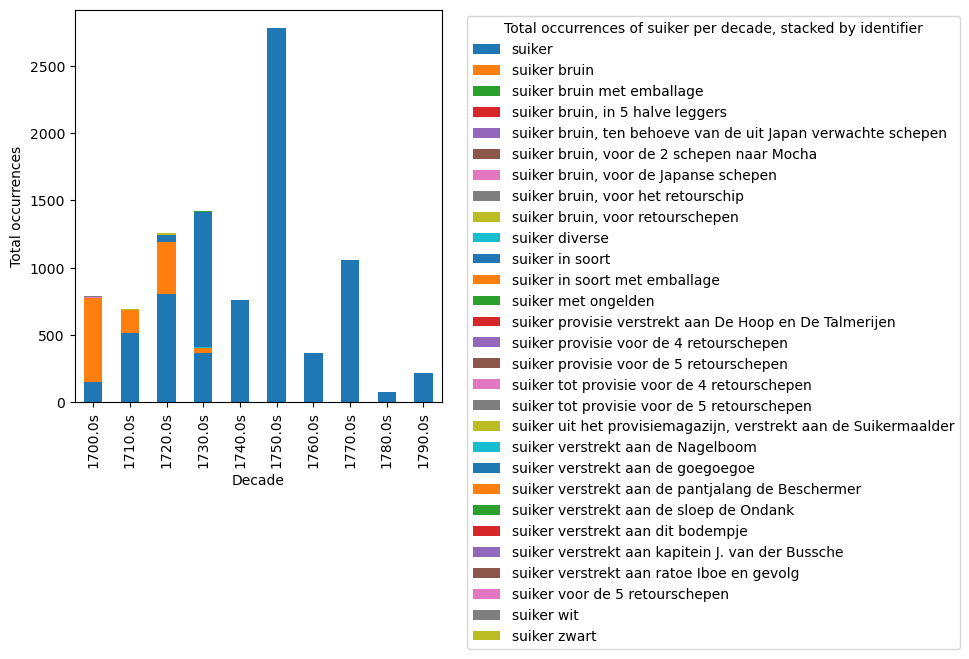

In [77]:
plot_commodity('suiker')

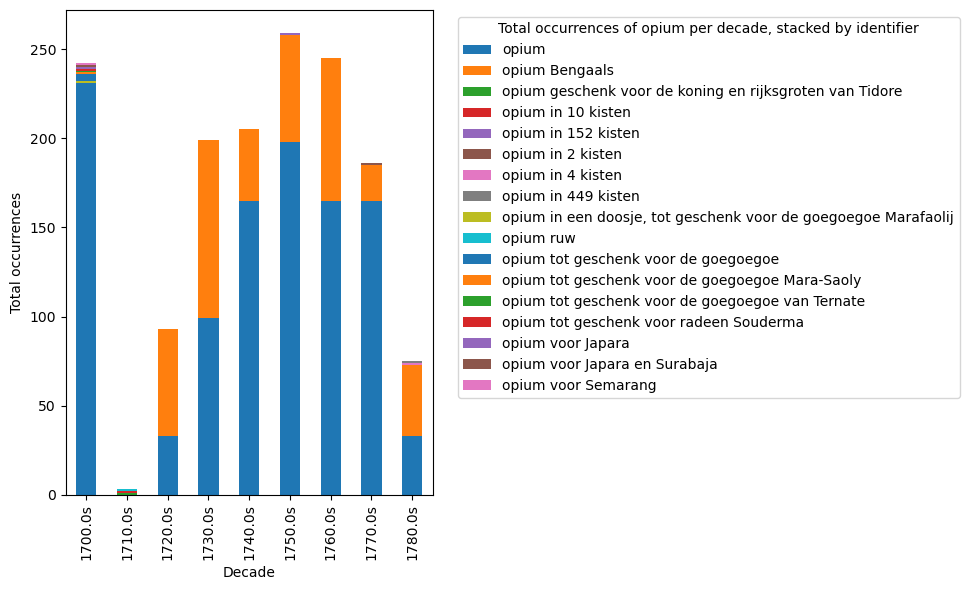

In [78]:
plot_commodity('opium')

/var/folders/zp/bd6xhyd10t3_hf1gm3jsc4m80000gn/T/ipykernel_27077/2174195309.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


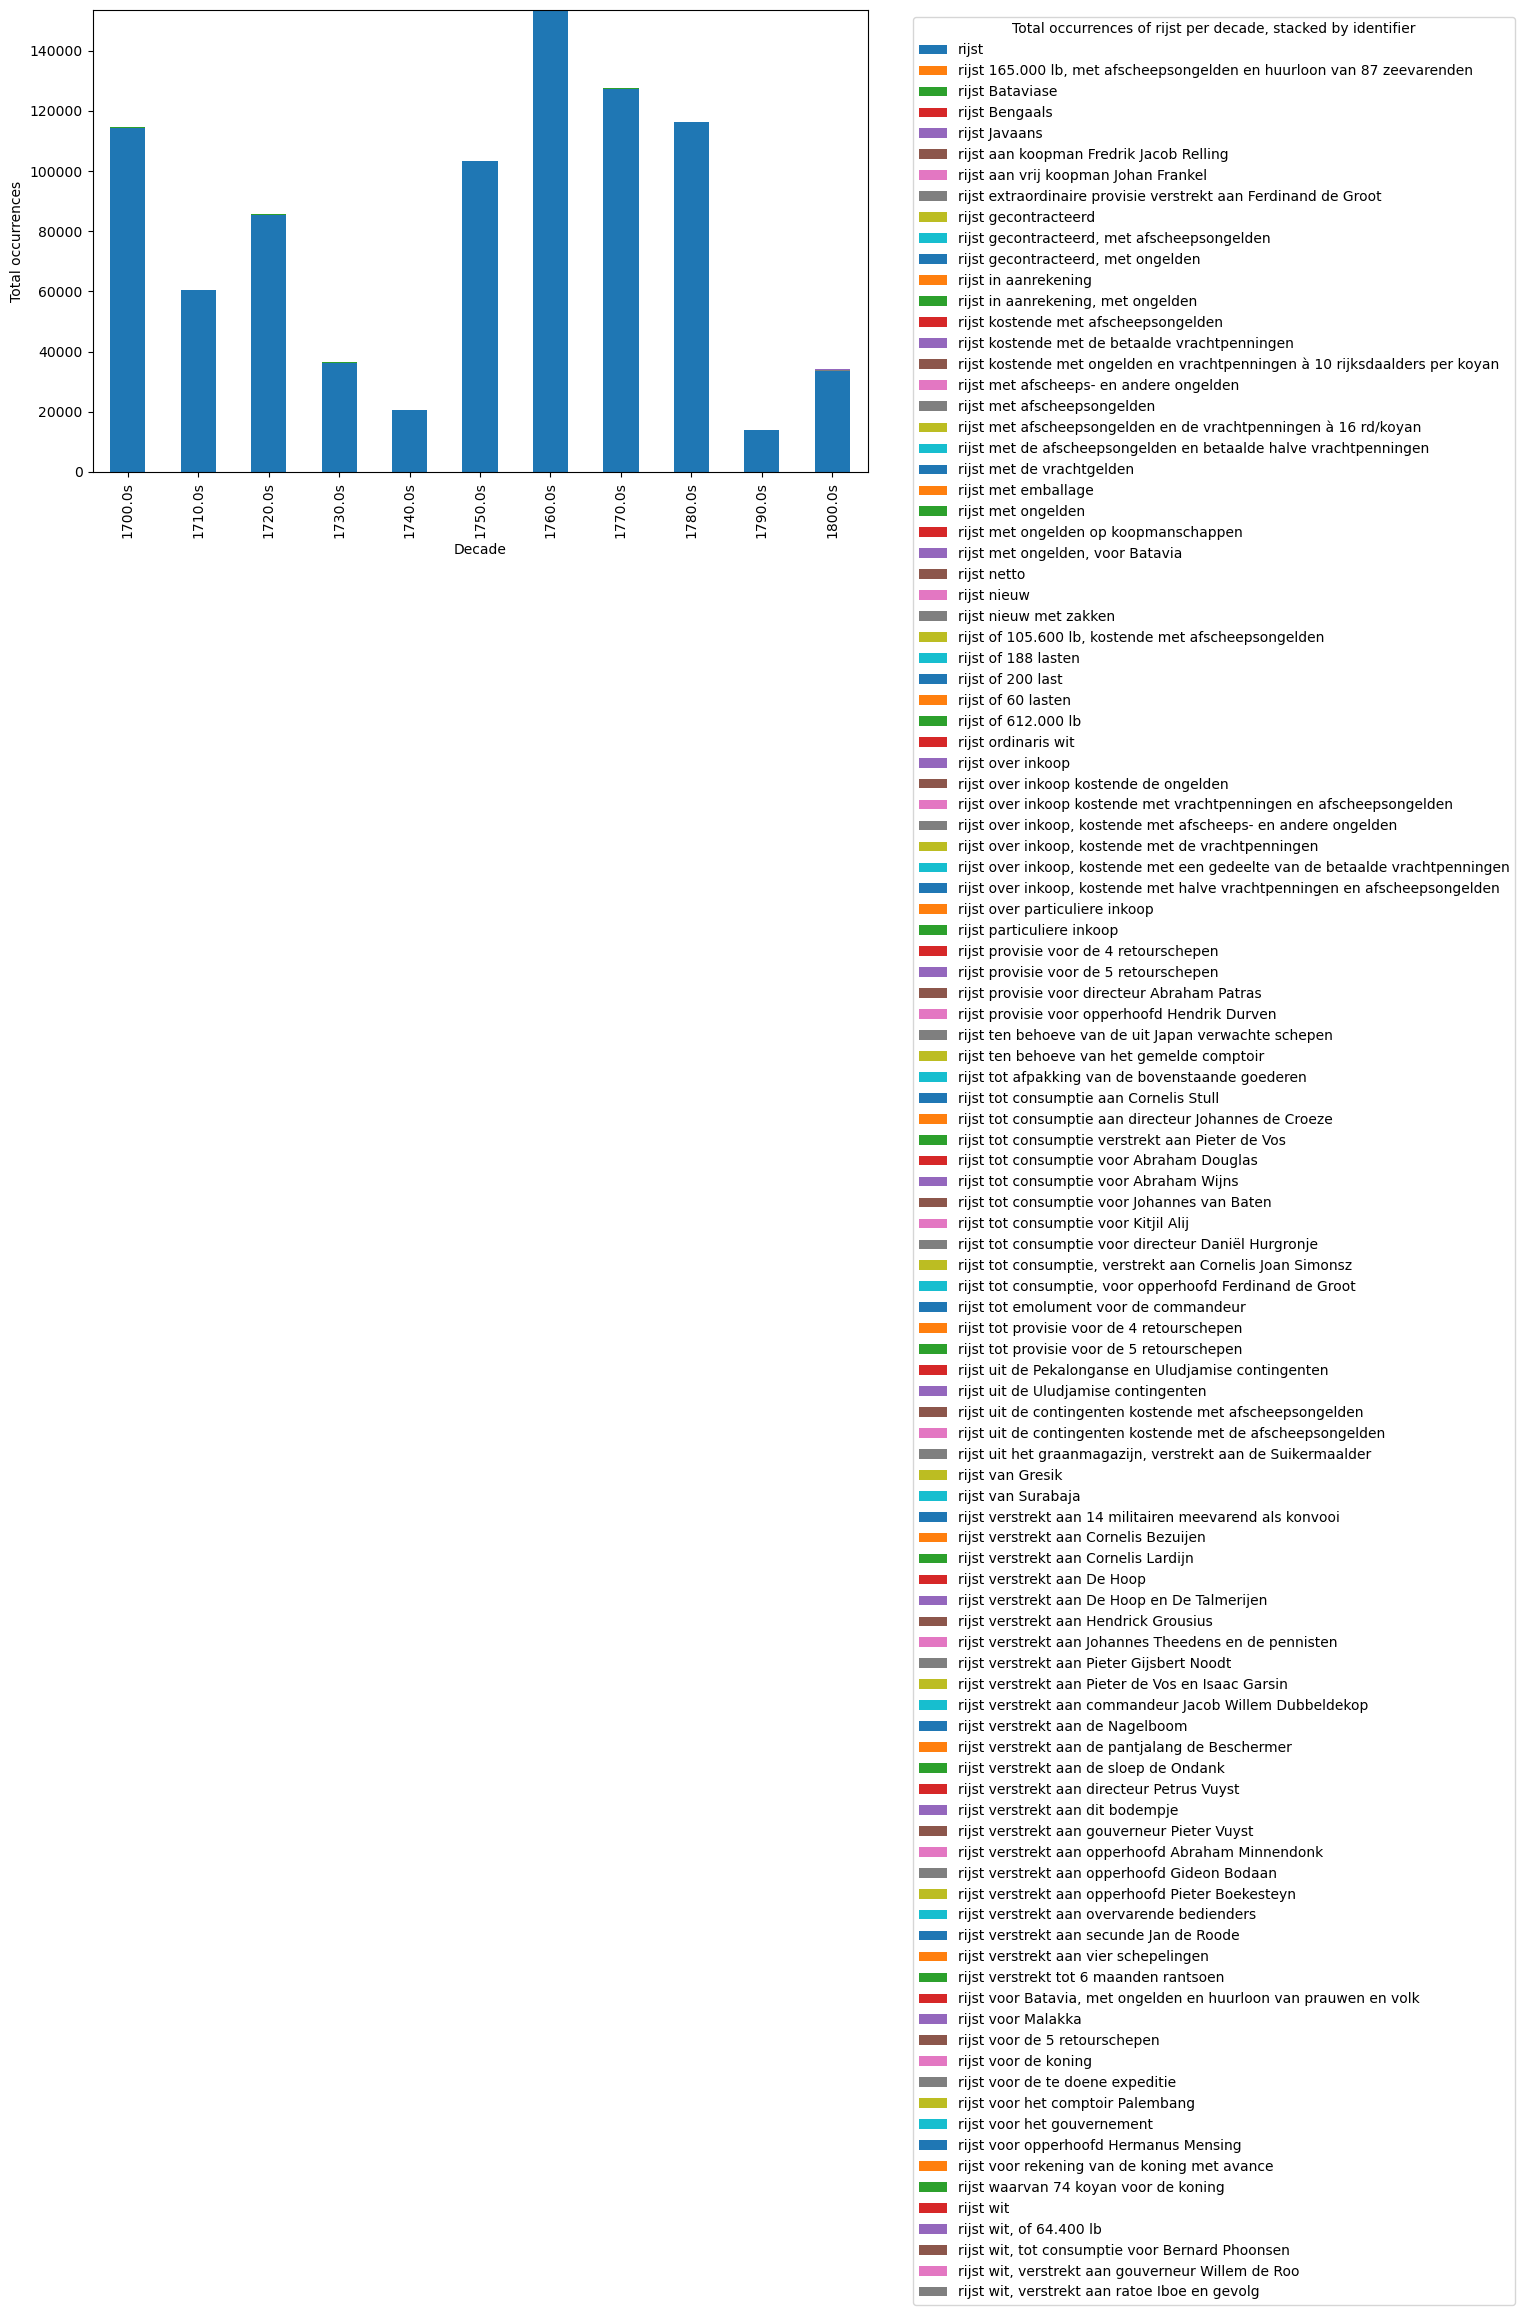

In [79]:
plot_commodity('rijst')

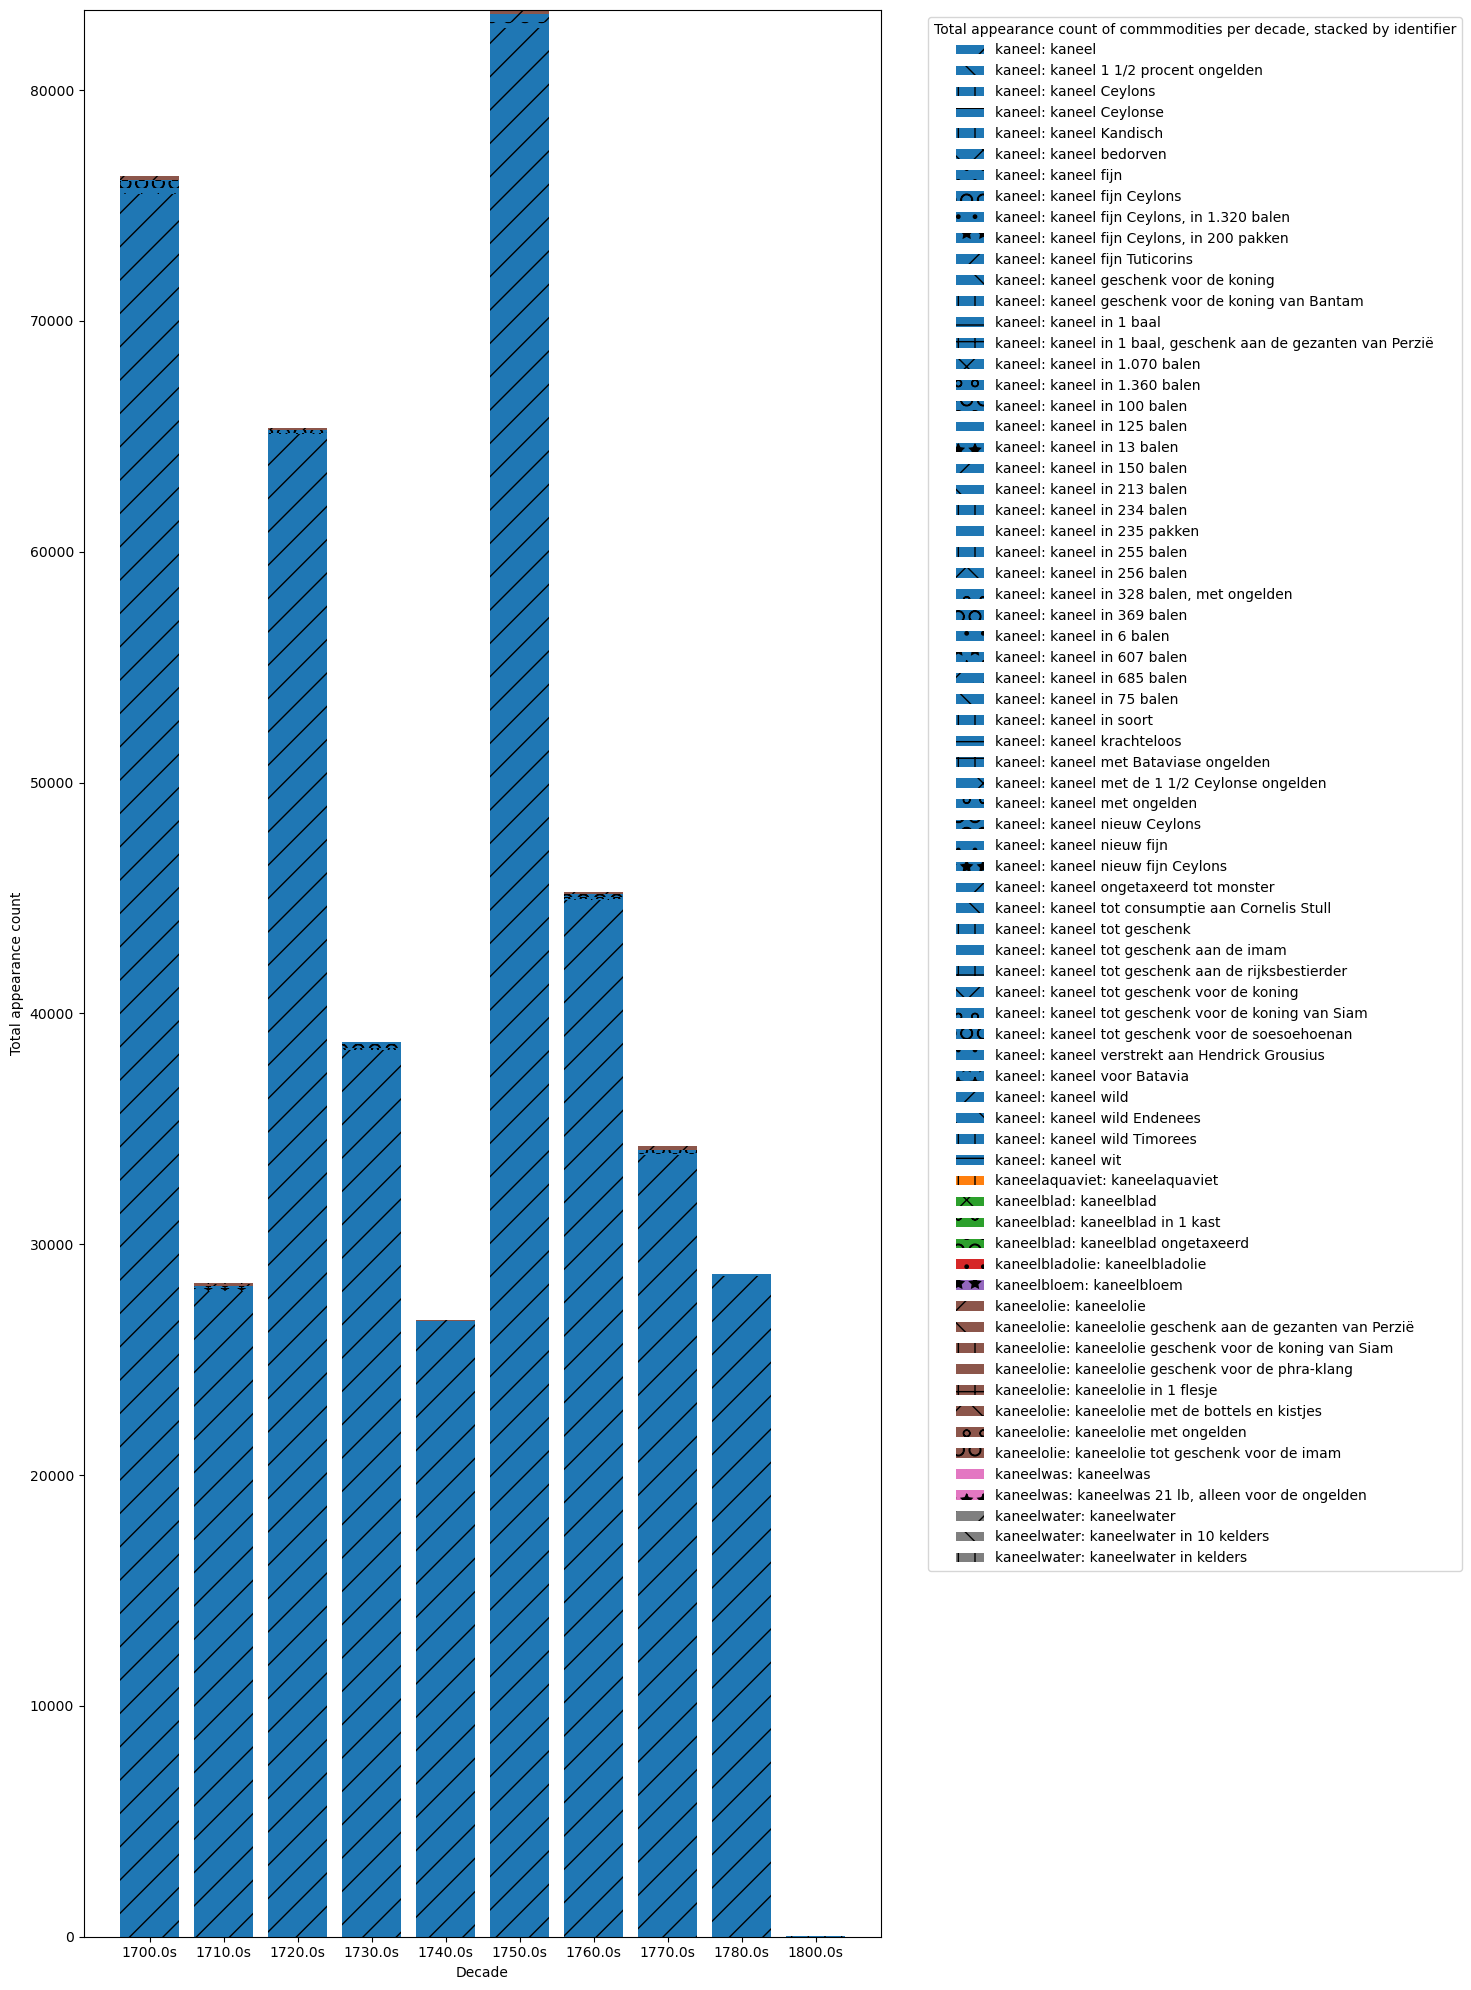

In [85]:
# Look at the cinnamon

df_target = filtered_df[filtered_df['naam'].str.startswith('kaneel')]
pivot_df = df_target.pivot_table(index='decade', columns=['naam','nameComplete'], values='appearance_count', aggfunc='sum', fill_value=0)

# Define hatch styles
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

# Generate a colour palette with a unique colour per commodity name
unique_names = df_target['naam'].unique()
palette = sns.color_palette("tab10", len(unique_names))  # Using a predefined colour palette
colour_map = dict(zip(unique_names, palette))

# Create the plot
fig, ax = plt.subplots(figsize=(15, 20))
bottom = np.zeros(len(pivot_df))

# Plot each column with different hatches
for i, (naam, nameComplete) in enumerate(pivot_df.columns):
    ax.bar(pivot_df.index, pivot_df[(naam, nameComplete)], bottom=bottom, label=f"{naam}: {nameComplete}",
           color=colour_map[naam], hatch=hatches[i % len(hatches)])
    bottom += pivot_df[(naam, nameComplete)].values

# # Plotting the stacked bar plot
# pivot_df.plot(kind='bar', stacked=True, figsize=(15, 9))

plt.ylabel('Total appearance count')
plt.xlabel('Decade')
plt.legend(title='Commodity with identifier')
plt.legend(title='Total appearance count of commmodities per decade, stacked by identifier',
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Display the plot
plt.show()

In [81]:
filtered_df[filtered_df['naam']=='rijst'].describe()

,carQuantityNumeric,voyDepartureYear,appearance_count
count,1.133000e+03,1133.000000,1133.000000
mean,5.603602e+04,1753.240953,764.853486
std,2.046729e+05,31.617122,353.665113
min,2.500000e-01,1700.000000,1.000000
25%,2.000000e+01,1724.000000,930.000000
50%,8.600000e+01,1761.000000,930.000000
75%,2.800000e+02,1779.000000,930.000000
max,1.440000e+06,1801.000000,930.000000


In [82]:
df_target = filtered_df[filtered_df['naam']=='rijst']
pivot_df = df_target.pivot_table(index='decade', columns='nameComplete', values='appearance_count', aggfunc='sum', fill_value=0)
pivot_df

nameComplete,rijst,"rijst 165.000 lb, met afscheepsongelden en huurloon van 87 zeevarenden",rijst Bataviase,rijst Bengaals,rijst Javaans,rijst aan koopman Fredrik Jacob Relling,rijst aan vrij koopman Johan Frankel,rijst extraordinaire provisie verstrekt aan Ferdinand de Groot,rijst gecontracteerd,"rijst gecontracteerd, met afscheepsongelden",...,rijst voor het comptoir Palembang,rijst voor het gouvernement,rijst voor opperhoofd Hermanus Mensing,rijst voor rekening van de koning met avance,rijst waarvan 74 koyan voor de koning,rijst wit,"rijst wit, of 64.400 lb","rijst wit, tot consumptie voor Bernard Phoonsen","rijst wit, verstrekt aan gouverneur Willem de Roo","rijst wit, verstrekt aan ratoe Iboe en gevolg"
decade,,,,,,,,,,,,,,,,,,,,,
1700.0s,114390,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,16,1,1,1,1
1710.0s,60450,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1720.0s,85560,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1730.0s,36270,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1740.0s,20460,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1750.0s,103230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760.0s,153450,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1770.0s,127410,0,1,4,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
1780.0s,116250,0,0,0,0,1,1,0,24,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
df_target

,naam,nameComplete,carQuantityNumeric,carVoyageId,voyDepartureYear,decade,appearance_count,category
170396,rijst,rijst tot provisie voor de 5 retourschepen,51.000,116750,1726.0,1720.0s,2,Granen en graanbereidingen
20475,rijst,rijst,8600.000,103104,1769.0,1760.0s,930,Granen en graanbereidingen
119362,rijst,rijst,100.000,113908,1723.0,1720.0s,930,Granen en graanbereidingen
139003,rijst,rijst,12.000,115081,1707.0,1700.0s,930,Granen en graanbereidingen
107057,rijst,rijst,15.000,113390,1724.0,1720.0s,930,Granen en graanbereidingen
...,...,...,...,...,...,...,...,...
100780,rijst,rijst,6.500,113215,1701.0,1700.0s,930,Granen en graanbereidingen
28442,rijst,rijst,2.687,104137,1766.0,1760.0s,930,Granen en graanbereidingen
145926,rijst,rijst,4.000,115473,1713.0,1710.0s,930,Granen en graanbereidingen
14695,rijst,rijst,210.000,102194,1776.0,1770.0s,930,Granen en graanbereidingen


### Plot commodity change per category <a class="anchor" id="plot-categories"></a>
#### [Go to top](#start)

In [ ]:
# Look at the most unstable category

df_target = filtered_df[filtered_df['category']=='Non-ferrometalen']
pivot_df = df_target.pivot_table(index='decade', columns=['naam','nameComplete'], values='appearance_count', aggfunc='sum', fill_value=0)

# Define hatch styles
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

# Generate a colour palette with a unique colour per commodity name
unique_names = df_target['naam'].unique()
palette = sns.color_palette("tab10", len(unique_names))  # Using a predefined colour palette
colour_map = dict(zip(unique_names, palette))

# Create the plot
fig, ax = plt.subplots(figsize=(15, 9))
bottom = np.zeros(len(pivot_df))

# Plot each column with different hatches
for i, (naam, nameComplete) in enumerate(pivot_df.columns):
    ax.bar(pivot_df.index, pivot_df[(naam, nameComplete)], bottom=bottom, label=f"{naam}: {nameComplete}",
           color=colour_map[naam], hatch=hatches[i % len(hatches)])
    bottom += pivot_df[(naam, nameComplete)].values

# # Plotting the stacked bar plot
# pivot_df.plot(kind='bar', stacked=True, figsize=(15, 9))

plt.ylabel('Total appearance count')
plt.xlabel('Decade')
plt.legend(title='Commodity with identifier')
plt.legend(title='Total appearance count of commmodities per decade, stacked by identifier',
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Display the plot
plt.show()

### Calculate regression slopes <a class="anchor" id="regression-slopes"></a>
#### [Go to top](#start)

In [89]:
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_slopes(data, window_size, overlap_size,metric='appearance_count'):
    slopes = []
    representative_years = []
    
    for start in range(0, len(data) - window_size + 1, window_size - overlap_size):
        end = start + window_size
        window_data = data.iloc[start:end]
        
        if len(window_data) == window_size:
            X = window_data['voyDepartureYear'].values.reshape(-1, 1)
            y = window_data[metric].values
            
            model = LinearRegression()
            model.fit(X, y)
            slopes.append(model.coef_[0])
            
            # Use the first year of the window as the representative year
            representative_years.append(int(window_data['voyDepartureYear'].iloc[0]))
    
    return representative_years, slopes

In [90]:
df_target = filtered_df[filtered_df['naam'].str.find('rijst')!=-1]
calculate_slopes(df_target, 10, 4)

([1726,
  1774,
  1764,
  1801,
  1784,
  1713,
  1722,
  1726,
  1765,
  1703,
  1786,
  1757,
  1754,
  1779,
  1801,
  1757,
  1762,
  1702,
  1783,
  1777,
  1764,
  1776,
  1726,
  1766,
  1713,
  1703,
  1754,
  1758,
  1763,
  1741,
  1727,
  1762,
  1726,
  1738,
  1774,
  1737,
  1775,
  1702,
  1763,
  1765,
  1779,
  1785,
  1758,
  1776,
  1730,
  1766,
  1735,
  1724,
  1702,
  1751,
  1743,
  1751,
  1801,
  1722,
  1726,
  1783,
  1768,
  1731,
  1787,
  1712,
  1700,
  1766,
  1776,
  1765,
  1758,
  1773,
  1703,
  1801,
  1723,
  1766,
  1711,
  1751,
  1703,
  1722,
  1760,
  1790,
  1726,
  1801,
  1760,
  1777,
  1751,
  1801,
  1723,
  1709,
  1702,
  1801,
  1735,
  1702,
  1753,
  1800,
  1722,
  1785,
  1782,
  1800,
  1759,
  1762,
  1722,
  1701,
  1785,
  1709,
  1769,
  1762,
  1769,
  1702,
  1702,
  1773,
  1782,
  1709,
  1767,
  1777,
  1754,
  1782,
  1761,
  1739,
  1714,
  1711,
  1772,
  1772,
  1772,
  1800,
  1763,
  1800,
  1755,
  1764,
  1769,
